___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Упражнения по логистической регрессии

**Задача: Создать модель классификации для предосказания того, есть ли у пациента признаки болезни сердца, в зависимости от физических характеристик этого человека (возраст, пол, холистерол и т.д.)**

**Выполните задания, указанные жирным шрифтом.**

## Imports

**ЗАДАНИЕ: Выполните команду ниже, чтобы импортировать нужные библиотеки.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Данные

В базе данных содержатся 14 атрибутов о физическом тестировании пациентов. Они сдают кровь и выполняют небольшой физический тест. Колонка "goal" указывает на наличие заболевания сердца у пациента - 0 означает заболевания нет, 1 означает заболевание есть. В общем случае, подтвердить на 100% заболевание сердца это очень инвазивный процесс, поэтому если мы сможем построить модель, которая достаточно точно оценивает вероятность заболевания, то это поможет избежать дорогих инвазивных процедур.

Содержимое

Информация об атрибутах:

* age - возраст
* sex - пол
* cp - chest pain - тип боли в груди (4 значения)
* trestbps - resting blood pressure - давление в состоянии покоя
* chol - уровень холистерина в крови, в mg/dl
* fbs - fasting blood sugar - уровень сахара в крови, > 120 mg/dl
* restecg - resting electrocardiographic results - результаты электрокардиограммы (значнеия 0,1,2)
* thalach - максимальный пульс
* exang - exercise induced angina - возникновение ангины в результате упражнений
* oldpeak = пиковые значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* slope - наклон пикового значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* ca - количество крупных сосудов (0-3), окрашенных флурозопией
* thal -  3 = нормально; 6 = фиксированный дефект; 7 = обратимый дефект
* target - 0 означает отсутствие заболевания сердца, 1 означает наличие заболевания сердца

Источник: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

----

**ЗАДАЧА: Запустите ячейку ниже, чтобы прочитать файл с данными.**

In [2]:
df = pd.read_csv('../DATA/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df['target'].unique()

array([1, 0], dtype=int64)

### Анализ данных и визуализация данных

Можете дополнительно исследовать данные.

**ЗАДАНИЕ: Посмотрите, есть ли в наборе данных отсутствующие значения, и создайте статистический отчёт о числовых колонках, как показано ниже.**

In [6]:
# Напишите Ваш код здесь
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Напишите Ваш код здесь
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Задачи по визуализации данных

**ЗАДАНИЕ: Нарисуйте график bar plot, показывающий количество точек для каждого значения target.**

<Axes: xlabel='target', ylabel='count'>

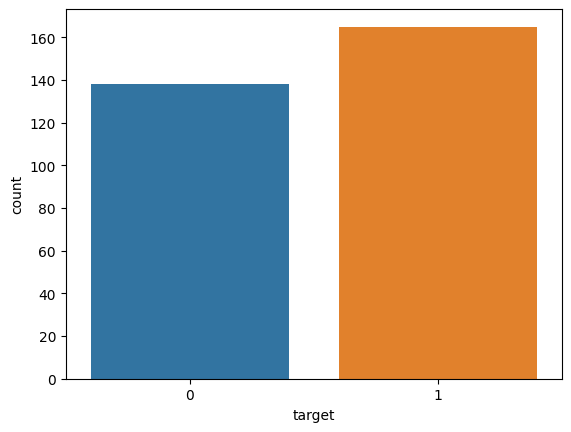

In [17]:
# Напишите Ваш код здесь
sns.countplot(data=df, x='target')

**ЗАДАНИЕ: Нарисуйте график pairplot, показывающий связи между следующими колонками:**

    ['age','trestbps', 'chol','thalach','target']
   
*Замечание: если запустить pairplot по всем колонкам, то это заняло бы очень много времени, поскольку колонок много.*

<Figure size 300x200 with 0 Axes>

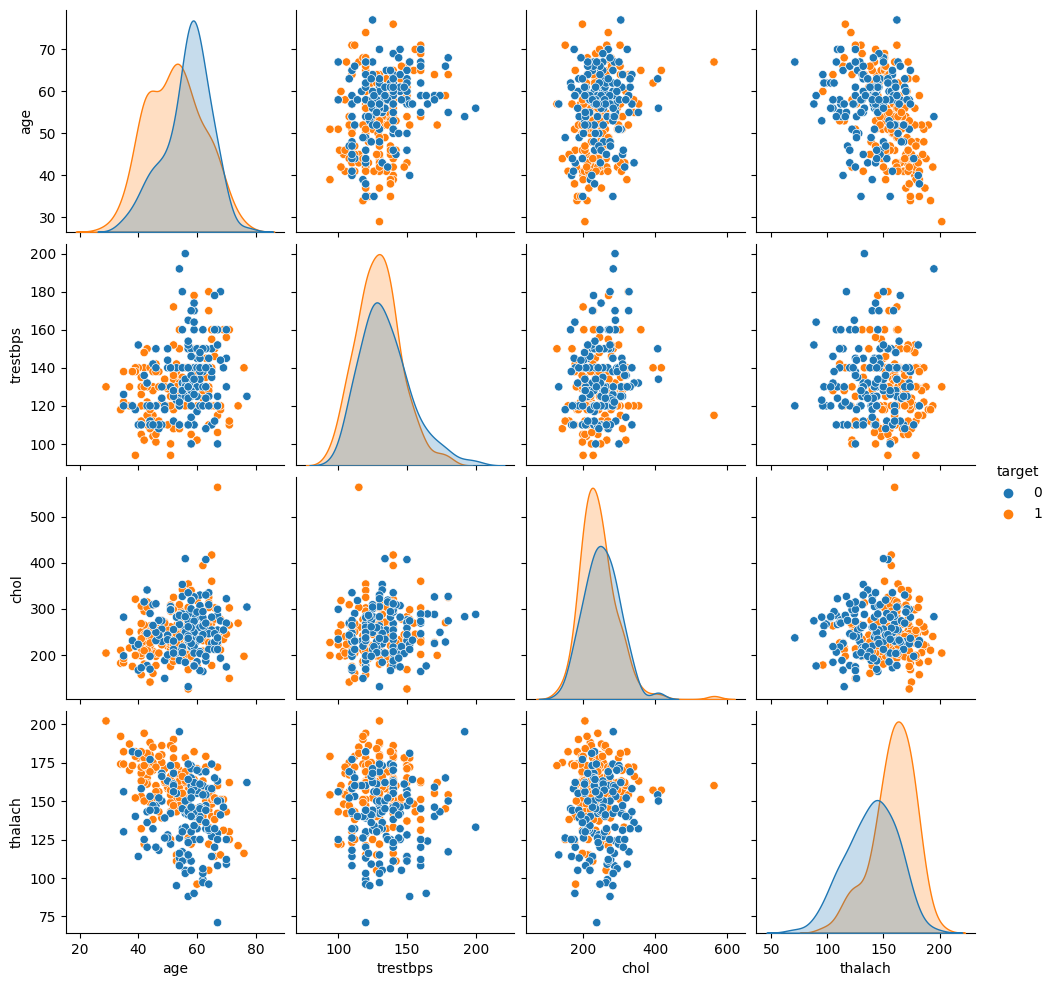

In [22]:
# Напишите Ваш код здесь
plt.figure(figsize=(3,2))
sns.pairplot(data=df[['age','trestbps', 'chol','thalach','target']], hue='target')

In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**ЗАДАНИЕ: Нарисуйте график heatmap, показывающий корреляции между всеми колонками.**

<Axes: >

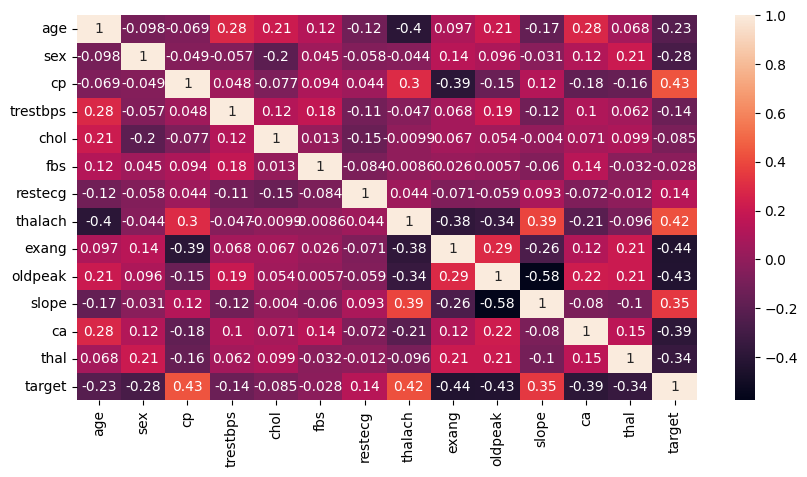

In [25]:
# Напишите Ваш код здесь
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

----
----

# Машинное обучение

## Разбиение на обучающий и тестовый наборы данных, а также масштабирование данных

**ЗАДАНИЕ: разделите все признаки на 2 объекта, X и y.**

In [26]:
# Напишите Ваш код здесь
X = df.drop('target', axis=1)

In [27]:
y = df['target']

**ЗАДАНИЕ: разбейте данные на обучающий и тестовый наборы данных. Для тестовых данных используйте размер 10% и значение random_state=101.**

In [28]:
# Напишите Ваш код здесь
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**ЗАДАНИЕ: С помощью объекта StandardScaler нормализуйте данные признаков в обучающем и тестовом наборах данных. При дальнейшем обучении модели убедитесь, что Вы проводите обучение только на обучающем наборе данных (без утечки данных из тестового набора данных).**

In [30]:
# Напишите Ваш код здесь
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Модель логистической регрессии

**ЗАДАНИЕ: Создайте модель логистической регрессии, и с помощью кросс-валидации найдите хорошее значение значение C. У Вас здесь есть 2 варианта - либо *LogisticRegressionCV*, либо комбинация *LogisticRegression* и *GridSearchCV*. Выбор за Вами. В блокноте с решениями мы используем более простой способ с использованием *LogisticRegressionCV*.**

In [33]:
# Напишите Ваш код здесь
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [34]:
log_model = LogisticRegression(solver='saga', multi_class='ovr', max_iter=5000)

In [35]:
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0, 1, 20)
c = np.logspace(0, 20, 40)

In [36]:
param_grid = {'penalty': penalty, 'l1_ratio': l1_ratio, 'C': c}

In [37]:
grid_model = GridSearchCV(log_model, param_grid)

In [38]:
grid_model.fit(scaled_X_train, y_train)

c:\Users\Андрей\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Андрей\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Андрей\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Андрей\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Андрей\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.25702066e+00, 1.06081836e+01, 3.45510729e+01,
       1.12533558e+02, 3.66524124e+02, 1.19377664e+03, 3.88815518e+03,
       1.26638017e+04, 4.12462638e+04, 1.34339933e+05, 4.37547938e+05,
       1.42510267e+06, 4.64158883e+06, 1.51177507e+07, 4.92388263e+0...
       2.57191381e+16, 8.37677640e+16, 2.72833338e+17, 8.88623816e+17,
       2.89426612e+18, 9.42668455e+18, 3.07029063e+19, 1.00000000e+20]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

**ЗАДАНИЕ: Отобразите результаты поиска оптимальных параметров, особенно значение C.** 

*Замечание: Ваше значение может отличаться от найденного нами, поскольку оно зависит от метода поиска.*

In [39]:
# Напишите Ваш код здесь
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [42]:
log_new_model = LogisticRegression(solver='saga', multi_class='ovr', max_iter=5000, C=1.0, penalty='l1')

In [43]:
log_new_model.fit(scaled_X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', penalty='l1',
                   solver='saga')

### Коэффициенты

**ЗАДАНИЕ: Отобразите коэффициенты модели.**

In [51]:
log_new_model.coef_

array([[-0.04788417, -0.69647658,  0.88803993, -0.23902406, -0.18647104,
         0.00236182,  0.09608036,  0.42188792, -0.40862901, -0.52461275,
         0.35765805, -0.8323313 , -0.5644873 ]])

**БОНУСНОЕ ЗАДАНИЕ: Мы не показывали это в блокноте лекции, но у Вас есть все навыки, чтобы сделать это! Сделайте визуализацию коэффициентов, нарисуя их с помощью графика barplot. Дополнительно можете попробовать выяснить, как отсортировать график! Если что-то будет не получаться, то смело заглядывайте в блокнот с решениями - это можно сделать разными способами, в нашем решении мы используем комбинацию pandas и seaborn.**

In [54]:
cofs = pd.Series(log_new_model.coef_[0], index=X.columns)
cofs = cofs.sort_values()

<Axes: >

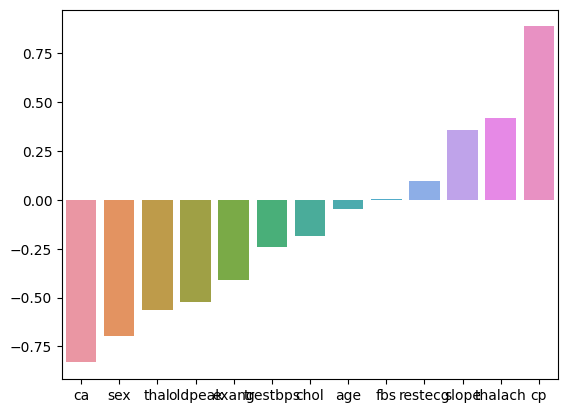

In [55]:
# Напишите Ваш код здесь
sns.barplot(x=cofs.index, y=cofs.values)

---------

## Оценка модели

**ЗАДАНИЕ: Оцените работу модели на оставшихся 10% данных - тестовом наборе данных.**

**ЗАДАНИЕ: Подготовьте следующие оценки:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [56]:
# Напишите Ваш код здесь
from sklearn.metrics import confusion_matrix, classification_report

In [57]:
y_pred = log_new_model.predict(scaled_X_test)

In [58]:
confusion_matrix(y_test, y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

In [59]:
# Напишите Ваш код здесь
print("Ne mogu blyat")

Ne mogu blyat


In [60]:
# Напишите Ваш код здесь
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



**Финальное задание: В офис клиники пришёл пациент со следующими значениями признаков:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**ЗАДАНИЕ: Что предскажет Ваша модель для этого пациента? Есть ли здесь заболевание сердца? Насколько модель "уверена" в своём прогнозе?**

*Для Вашего удобства мы создали массив с указанными выше значениями:*

In [61]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [62]:
y_new_pred = log_new_model.predict(patient)

In [63]:
y_new_pred

array([0], dtype=int64)

In [64]:
log_new_model.predict_proba(patient)

array([[1.00000000e+00, 1.30196916e-18]])

----

## Отличная работа!